This script diagnose the model generated by quantile regression of relative humidity on Tmax

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/Users/jiacan/Documents/StatisticsES/data/output/NYC/'

In [3]:
# read raw data
f1 = '{:}Original_Tmax_RH_NYC_group1.csv'.format(path)
ds1 = np.loadtxt(f1,dtype='f4',delimiter=',', skiprows=1)
Tmax = ds1[:,0]
RH = ds1[:,1]

In [4]:
# set upper and lower bound
T_le = np.arange(16,32,2)
T_ue = np.arange(18,34,2)

## df=10, define the end-bins by interpolation

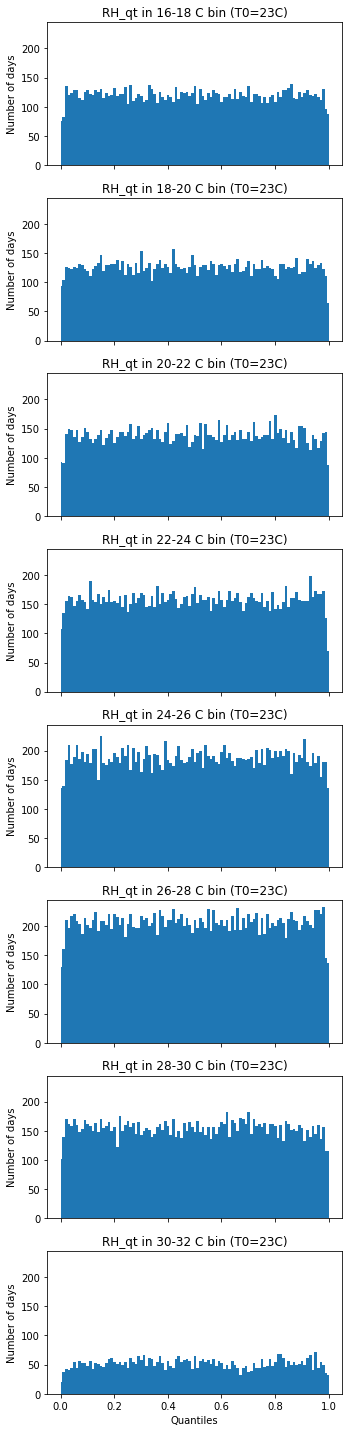

In [33]:
# read model and fitted model
T0_k = 23
f2 = '{:}FittedRH_on_Tmax_100q_NYC_group1(T0={:}).csv'.format(path,T0_k)
ds2 = np.loadtxt(f2,dtype='f4',delimiter=',', skiprows=1)
q = np.arange(0.01,1,0.01)

# extrapolate q to 0.05 and 0.995
q995 = (ds2[:,98]-ds2[:,97])/2+ds2[:,98]
q005 = ds2[:,0]-(ds2[:,1]-ds2[:,0])/2

bin_edges = np.hstack([0,q-0.004,0.994,1])
fig, axes = plt.subplots(len(T_le), figsize=(5, 20), sharex=True, sharey=True,
                        tight_layout=True)
for k in range(len(T_le)):
    ind = np.where((Tmax>T_le[k])&(Tmax<=T_ue[k]))[0]
    RH_inb = RH[ind]   
    qt = ds2[ind,:]
    q995_k = q995[ind]
    q005_k = q005[ind] 
    # find the corresponding qt for each RH_inb 
    RH_qt = np.zeros(len(RH_inb))
    for i in range(len(RH_inb)):
        diff = qt[i,:]-RH_inb[i]
        if np.all(diff<0):
            if RH_inb[i]>q995_k[i]:
                RH_qt[i]=0.995
            else:
                RH_qt[i]=0.99
        elif np.all(diff>0):
            if RH_inb[i]<q005_k[i]:
                RH_qt[i]=0.005
            else:
                RH_qt[i]=0.01
        else:
            RH_qt[i] = q[np.argmin(abs(diff))]
        # plot
    if k==(len(T_le)-1):
        axes[k].set_xlabel('Quantiles')
    axes[k].hist(RH_qt, bins = bin_edges)
    axes[k].set_ylabel('Number of days')
    axes[k].set_title('RH_qt in {:}-{:} C bin (T0={:}C)'.format(T_le[k],T_ue[k],T0_k))

## df=10, evenly destributed bins

In [10]:
q.shape

(99,)

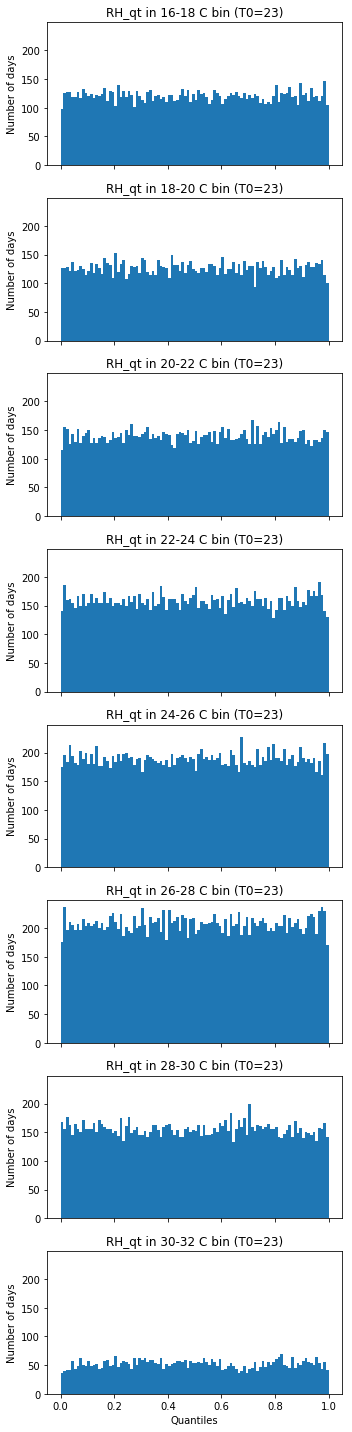

In [11]:
# read model and fitted model
To = 23
f2 = '{:}FittedRH_on_Tmax_100q_NYC_group1(T0={:}_df=10).csv'.format(path,To)
ds2 = np.loadtxt(f2,dtype='f4',delimiter=',', skiprows=1)
q = np.arange(0,1,0.01)
bin_edges = np.hstack([0,q,1])
fig, axes = plt.subplots(len(T_le), figsize=(5, 20), sharex=True, sharey=True,
                        tight_layout=True)
for k in range(len(T_le)):
    RH_inb = RH[(Tmax>T_le[k])&(Tmax<=T_ue[k])]   
    qt = ds2[(Tmax>T_le[k])&(Tmax<=T_ue[k]),:]
    # find the corresponding qt for each RH_inb 
    RH_qt = np.zeros(len(RH_inb))
    for i in range(len(RH_inb)):
        diff = qt[i,:]-RH_inb[i]
        if np.all(diff<0):
            RH_qt[i]=0.995
        elif np.all(diff>0):
            RH_qt[i]=0.005
        else:
            ind = np.argmin(abs(diff))
            RH_qt[i] = q[ind]
    # plot
    if k==(len(T_le)-1):
        axes[k].set_xlabel('Quantiles')
    axes[k].hist(RH_qt, bins = bin_edges)
    axes[k].set_ylabel('Number of days')
    axes[k].set_title('RH_qt in {:}-{:} C bin (T0={:})'.format(T_le[k],T_ue[k],To))

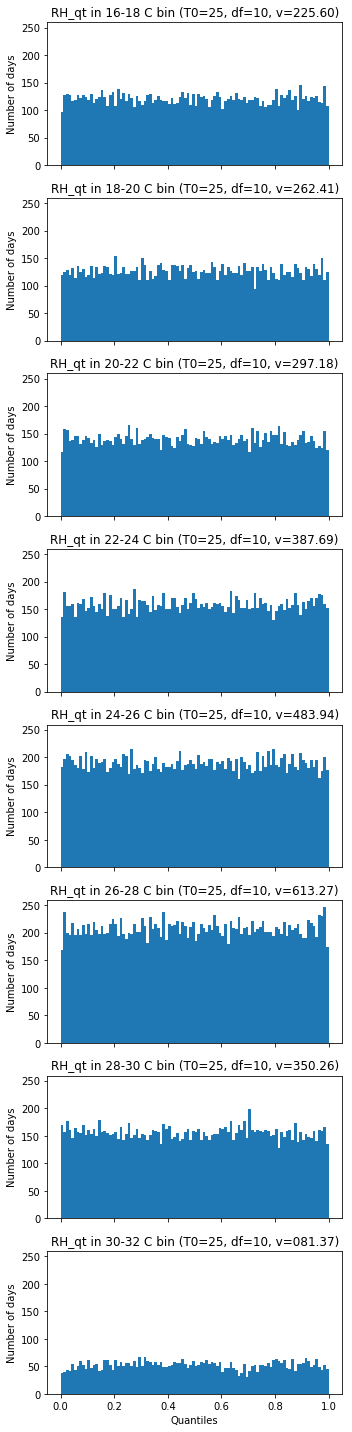

In [27]:
# read model and fitted model
To = 25
f2 = '{:}FittedRH_on_Tmax_100q_NYC_group1(T0={:}_df=10).csv'.format(path,To)
ds2 = np.loadtxt(f2,dtype='f4',delimiter=',', skiprows=1)
q = np.arange(0,1,0.01)
bin_edges = np.hstack([0,q,1])
fig, axes = plt.subplots(len(T_le), figsize=(5, 20), sharex=True, sharey=True,
                        tight_layout=True)
for k in range(len(T_le)):
    RH_inb = RH[(Tmax>T_le[k])&(Tmax<=T_ue[k])]   
    qt = ds2[(Tmax>T_le[k])&(Tmax<=T_ue[k]),:]
    # find the corresponding qt for each RH_inb 
    RH_qt = np.zeros(len(RH_inb))
    for i in range(len(RH_inb)):
        diff = qt[i,:]-RH_inb[i]
        if np.all(diff<0):
            RH_qt[i]=0.995
        elif np.all(diff>0):
            RH_qt[i]=0.005
        else:
            ind = np.argmin(abs(diff))
            RH_qt[i] = q[ind]
    # plot
    if k==(len(T_le)-1):
        axes[k].set_xlabel('Quantiles')
    [n,bins,patches]=axes[k].hist(RH_qt, bins = bin_edges)
    axes[k].set_ylabel('Number of days')
    axes[k].set_title('RH_qt in {:}-{:} C bin (T0={:}, df=10, v={:06.2f})'.format(T_le[k],T_ue[k],To,np.var(n)))

In [25]:
n

array([  0.,  38.,  39.,  43.,  42.,  54.,  44.,  50.,  60.,  53.,  45.,
        61.,  46.,  52.,  55.,  42.,  43.,  62.,  61.,  52.,  44.,  62.,
        51.,  58.,  50.,  56.,  56.,  50.,  59.,  48.,  66.,  50.,  67.,
        59.,  57.,  53.,  57.,  52.,  58.,  48.,  49.,  50.,  52.,  57.,
        56.,  56.,  63.,  54.,  46.,  52.,  59.,  50.,  53.,  58.,  56.,
        61.,  54.,  57.,  56.,  50.,  57.,  39.,  47.,  46.,  58.,  47.,
        43.,  33.,  38.,  54.,  31.,  42.,  50.,  52.,  39.,  52.,  52.,
        51.,  56.,  49.,  62.,  64.,  59.,  56.,  62.,  47.,  45.,  63.,
        41.,  55.,  54.,  56.,  65.,  60.,  48.,  52.,  63.,  49.,  43.,
        53.,  45.])

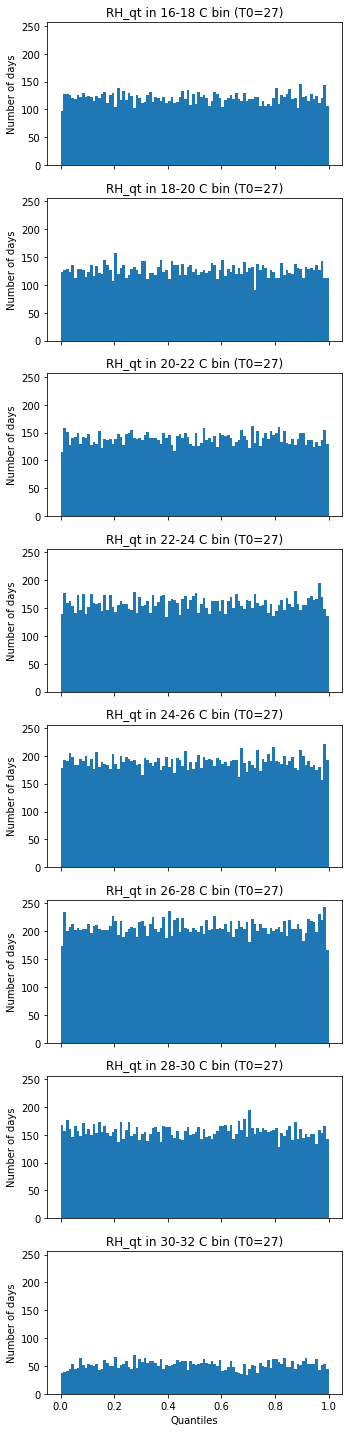

In [13]:
# read model and fitted model
To = 27
f2 = '{:}FittedRH_on_Tmax_100q_NYC_group1(T0={:}_df=10).csv'.format(path,To)
ds2 = np.loadtxt(f2,dtype='f4',delimiter=',', skiprows=1)
q = np.arange(0,1,0.01)
bin_edges = np.hstack([0,q,1])
fig, axes = plt.subplots(len(T_le), figsize=(5, 20), sharex=True, sharey=True,
                        tight_layout=True)
for k in range(len(T_le)):
    RH_inb = RH[(Tmax>T_le[k])&(Tmax<=T_ue[k])]   
    qt = ds2[(Tmax>T_le[k])&(Tmax<=T_ue[k]),:]
    # find the corresponding qt for each RH_inb 
    RH_qt = np.zeros(len(RH_inb))
    for i in range(len(RH_inb)):
        diff = qt[i,:]-RH_inb[i]
        if np.all(diff<0):
            RH_qt[i]=0.995
        elif np.all(diff>0):
            RH_qt[i]=0.005
        else:
            ind = np.argmin(abs(diff))
            RH_qt[i] = q[ind]
    # plot
    if k==(len(T_le)-1):
        axes[k].set_xlabel('Quantiles')
    [n,bins,patches]=axes[k].hist(RH_qt, bins = bin_edges)
    axes[k].set_ylabel('Number of days')
    axes[k].set_title('RH_qt in {:}-{:} C bin (T0={:}, df=10, v={:06.2f})'.format(T_le[k],T_ue[k],To,np.var(n)))

## the model fitted by 15 pbs basis functions

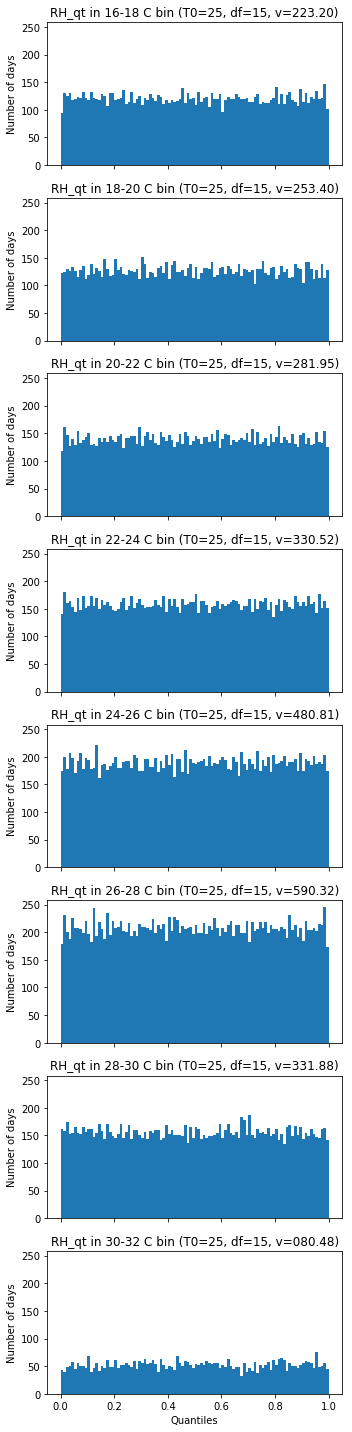

In [23]:
# read model and fitted model
To = 25
f2 = '{:}FittedRH_on_Tmax_100q_NYC_group1(T0={:}_df=15).csv'.format(path,To)
ds2 = np.loadtxt(f2,dtype='f4',delimiter=',', skiprows=1)
q = np.arange(0,1,0.01)
bin_edges = np.hstack([0,q,1])
fig, axes = plt.subplots(len(T_le), figsize=(5, 20), sharex=True, sharey=True,
                        tight_layout=True)
for k in range(len(T_le)):
    RH_inb = RH[(Tmax>T_le[k])&(Tmax<=T_ue[k])]   
    qt = ds2[(Tmax>T_le[k])&(Tmax<=T_ue[k]),:]
    # find the corresponding qt for each RH_inb 
    RH_qt = np.zeros(len(RH_inb))
    for i in range(len(RH_inb)):
        diff = qt[i,:]-RH_inb[i]
        if np.all(diff<0):
            RH_qt[i]=0.995
        elif np.all(diff>0):
            RH_qt[i]=0.005
        else:
            ind = np.argmin(abs(diff))
            RH_qt[i] = q[ind]
    # plot
    if k==(len(T_le)-1):
        axes[k].set_xlabel('Quantiles')
    [n,bins,patches]=axes[k].hist(RH_qt, bins = bin_edges)
    axes[k].set_ylabel('Number of days')
    axes[k].set_title('RH_qt in {:}-{:} C bin (T0={:}, df=15, v={:06.2f})'.format(T_le[k],T_ue[k],To,np.var(n)))

## df=20, empirical inverse quantiles

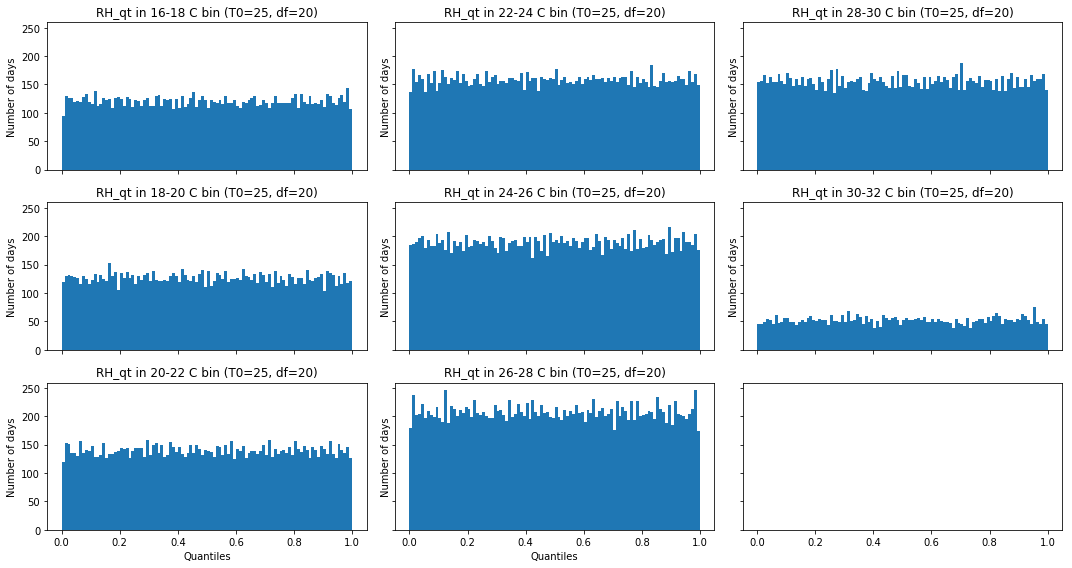

In [14]:
# read model and fitted model
To = 25
f2 = '{:}FittedRH_on_Tmax_100q_NYC_group1(T0={:}_df=20).csv'.format(path,To)
ds2 = np.loadtxt(f2,dtype='f4',delimiter=',', skiprows=1)
q = np.arange(0,1,0.01)
bin_edges = np.hstack([0,q,1])
fig, axes = plt.subplots(3,3, figsize=(15, 8), sharex=True, sharey=True,
                        tight_layout=True)
for k in range(len(T_le)):
    RH_inb = RH[(Tmax>T_le[k])&(Tmax<=T_ue[k])]   
    qt = ds2[(Tmax>T_le[k])&(Tmax<=T_ue[k]),:]
    # find the corresponding qt for each RH_inb 
    RH_qt = np.zeros(len(RH_inb))
    for i in range(len(RH_inb)):
        diff = qt[i,:]-RH_inb[i]
        if np.all(diff<0):
            RH_qt[i]=0.995
        elif np.all(diff>0):
            RH_qt[i]=0.005
        else:
            ind = np.argmin(abs(diff))
            RH_qt[i] = q[ind]
    # plot
    x = k%3
    y = k/3
    if x==2:
        axes[x,y].set_xlabel('Quantiles')
    [n,bins,patches]=axes[x,y].hist(RH_qt, bins = bin_edges)
    axes[x,y].set_ylabel('Number of days')
    axes[x,y].set_title('RH_qt in {:}-{:} C bin (T0={:}, df=20)'.format(T_le[k],T_ue[k],To))

In [12]:
k/3

2